# Applied Economic Analysis 1
## Python Assignment

|Name|examnr.|
|----|-------|
|GE van der Meulen|532882|

# Educational attainment as a determinant of income inequality

# 1. Introduction

Income inequality is likely to be the most debated topic in the economic literature in the past decade. Following the financial and subsequent sovereign debt crises, the 2010s will especially in Europe be remembered for a deep and long economic recession and the subsequent rise op populism. Income inequality has been rising in the last 3 decades in most developed countries, and has been frequently pointed to as one of the causes of the financial crisis (Rajan, 2010; Kumhof and Rancière, 2011). 
Research of Piketty (2015) gained considerable media attention, but was part of a broad range of publications in the early 2010s about income inequality.

Research on the determinants of income inequality is relatively limited. On the one hand, this is easy to explain as income inequality mainly stems from cultural preferences and political choices. However, the rise in income inequality relative to the last 3 centuries cannot only be explained by political choices. In his work, Piketty argues that "the rise in top income shares in the US over the 1980-2010 period is due for the most part to rising inequality of labor earnings", in turn mostly related to the supply and demand of skills and education. The role of education in the development of income inequality is central in my project.

Kuznets (1955) famously adressed the relationship between income per capita and income inequality. The "Kuznets curve" describes the inverse U-curve effect that income has on income inequality. At low levels of income, inequality increases when countries get wealthier, but this effect slowly diminishes until becoming negative after a certain treshold.

Many scholars have applied empirical studies to this theory, finding substantial evidence for it (Ahluwalia, 1976; Nielsen and Alderson, 1997). These studies also show that the declining section of the Kuznets curve starts around 1970. Since the data in my study is almost entirely composed of observations after 1970, I expect a negative relation between income inequality and income per capita. 

The relationship between education and income differences has also been studied by the literature. Escpecially Mincer (1958) can be considered as one of the fathers of this topic. Generally speaking, education is seen as a powerful instrument for reducing income inequality for the following reasons. First, education is a fundamental determinant for future income. As a broader share of society can access high education, future differences in income are reduced. This is particularly true if higher educational attainment figures arise because of the low income groups accessing education on a broader scale. Access to education is also likely to increase income mobility, which in turn would dampen income inequality in the long run. Third, higher levels of educational attainment mean higher educated democracies, less subject to lobbying activities of the rich, increasing social and job opportunities of the poor.


In this project, in section 2 I will first present the main features of the model of Mincer (1958), and will then build on this model to look at the intraction between income inequality and educational attainment. In section 3 I will empirically study the relationship between income inequality and educational attainment. I will first show graphical evidence of this relationship, and follow with some OLS estimations. Section 4 will conclude with some final considerations.

In [2]:
import pandas as pd
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import *
import random
import wbdata as wb
import pylab



# 2.  A model for education and income inequality
## 2.1 The Mincer Model

The assumptions of the model as described in Mincer (1958) are the following.

-  The occupation level of a worker depends on the amount of years $n$ of education. 
-  The quality of performance on the job is a function of formal training plus experience, both measured in time units.

According to observational data, this slope will be higher in jobs with higher levels of skill and complexity. Moreover, more capable and educated individuals tend to grow faster and longer than others in the performance of the same task. These findings suggest that experience influences productivity more strongly in jobs that normally require more training. In brief, differences in training result in differences in levels of earnings among occupations, as well as in differences in slopes of life-paths of earnings among occupations. The higher the occupational rank, the higher the level of earnings and the steeper the life-path of earnings. 

An implication of the above described situation is that the income differences corresponding to different occupational categories increase with age. 

For convenience, we divide the labor force into two broad groups of occupations, those requiring very little education, and those requiring a considerable amount of education. 

In [2]:
age = np.arange(15,65,0.1) #I assume that the labor force is aged between 15 and 64 years
def earnings_noedu(age): #Mincer equation for the non-educated
    return 1.5+0.01*age
def earnings_edu(age): #Mincer equation for the Educated
    return -3+0.15*age

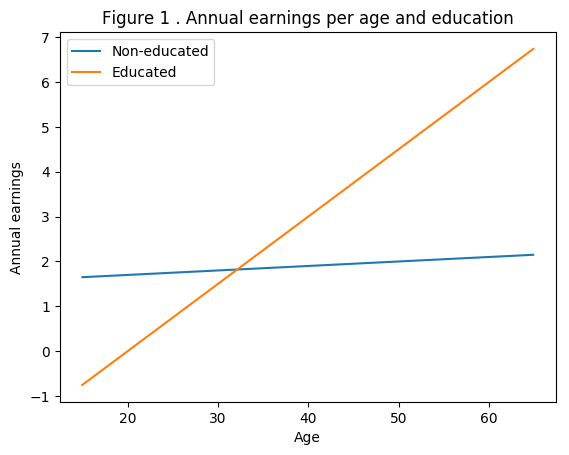

In [3]:
plt.rcdefaults()
plt.plot(age,[earnings_noedu(age) for age in age], label = 'Non-educated')
plt.plot(age,[earnings_edu(age) for age in age], label = 'Educated')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Annual earnings')
plt.title('Figure 1 . Annual earnings per age and education')
axes = plt.gca()
plt.show()

Figure 1 shows the earnings per age for two different education levels. The earnings for the non-educated group start at a positive value already at age 15, but increase slowly over time. The educated start with negative income, as they invest money for their education, and start earning positive amounts around their 20th birthday. First, we note that absolute differences in earnings are small within non-educated groups, but are pronounced in the educated group. 
Second, the differences in earnings between the two occupational groups increase as we move from a younger to an older occupation-mix. 

At this point Mincer (1958) discusses other issues that are not really relevant for the purpose of this project. Therefore, I start from this basic setup to discuss how education and income inequality are related in a way that allows me to better apply the Python skills learned during the past semester.

## 2.2 Modelling (continued)

I will build on the basic Mincer model to show how educational attainment can affect income inequality. 

I first define the number of workers in the labor market, i.e. the labor force. 

Then I have to make an assumption about how this labor force is divided between educated and non-educated workers. In the following example I split them in two equal groups, i.e. 50% each. 

I also assume that the population is equally distributed among different ages, so that there will be the same number of individuals for every age between 15 and 64.

In [4]:
labor_force = 10000 # Assume a labor force of 10000 individuals
# assume that 50% of the workers is educated, and 50% is not
share_edu = 0.5
edu = share_edu*labor_force
non_edu = labor_force-edu
# assuming the labor force is equally distributed among ages, we can define the number of individuals for every age as
non_edu_per_age = int(non_edu/50) #since between 15 and 64 there are 50 years, I divide by 50
edu_per_age = int(edu/50)
#age of each individual in both groups:
age_in_non_edu = np.concatenate([age]*non_edu_per_age)
age_in_edu = np.concatenate([age]*edu_per_age)

In [13]:
# wih a for loop, I create a new list where I add all the earnings based on the Mincer equations above
income_i = []
for x in age_in_non_edu:
    income_i.append(earnings_noedu(x))
for x in age_in_edu:
    income_i.append(earnings_edu(x))

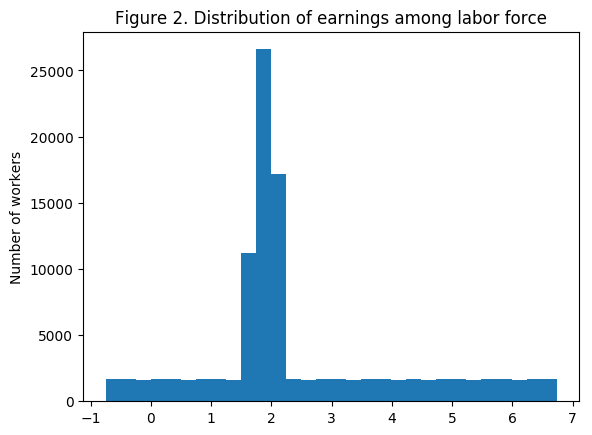

In [14]:
plt.hist(income_i, bins=30) # plot the distribution of incomes
plt.title('Figure 2. Distribution of earnings among labor force')
plt.ylabel('Number of workers')
plt.show()

Figure 2 depicts the distribution of annual earnings when the share of educated workers is 50%. As can be seen, the Kurtosis is very high. This is due to the fact that the non educated group all have very similar earnings. The tails of this distribution are not decreasing, which is due to the fact that all incomes enter with the same frequency.

I want to compute the Gini coefficient for this labor market. 

In [15]:
# Now I look at the Gini coefficient for this labor force
def gini(list_of_values): # define a new function that computes Gini coefficient
    sorted_list = sorted(list_of_values) # first sort the values in ascending order
    height, area = 0, 0 # define height and area
    for value in sorted_list: 
        height += value #in each loop sum up another value in the list
        area += height - value / 2. # make the area between 45% and Lorenz curve
    fair_area = height * len(list_of_values) / 2. #make the total triangle
    return (fair_area - area) / fair_area # compute gini
print('The Gini coefficient for an economy with 50% educated workers is ' + "%.2f" % gini(income_i))

The Gini coefficient for an economy with 50% educated workers is 0.34


This number is actually very comparable to the Gini coefficient of several delevoped countries nowadays. 

Eventually, we want to study the relationship between educational attainment and income inequality. To do this, we look at how the Gini coefficient changes with different shares of educated workers in the labor force.
As such, I compute the Gini coefficient for every combination of educated and non educated in the labor force. 
These combinations are as follows


|Educated (%)|Non educated (%)|
|----|-------|
|10|90|
|20|80|
|30|70|
|40|60|
|50|50|
|60|40|
|70|30|
|80|20|
|90|10|

Once I compute the respective Gini coefficients, I will plot them all together to show how educational attainment and income inequality relate to eachother in the model. 

In [17]:
# we define the number of educated workers as a share of the labor market
share_edu = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
gini_results = [] # create a list of gini coefficients
for x in share_edu: 
    edu = x*labor_force
    non_edu = (1-x)*labor_force
    # assuming the labor force is equally distributed among ages
    non_edu_per_age = int(non_edu/50)
    edu_per_age = int(edu/50)
    #age of individuals in each group:
    age_in_non_edu = np.concatenate([age]*non_edu_per_age)
    age_in_edu = np.concatenate([age]*edu_per_age)
    #now we define a function for annual earnings per worker
    income_i = []
    for x in age_in_non_edu:
        income_i.append(earnings_noedu(x))
    for x in age_in_edu:
        income_i.append(earnings_edu(x))
    gini_results.append(gini(income_i)) # for every combination of educated and non educated, compute the Gini coefficient and store it in "Gini_results"

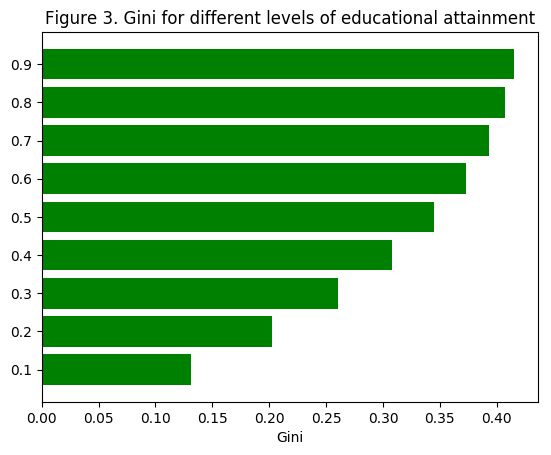

In [20]:
fig, ax = plt.subplots()
ax.barh(range(len(gini_results)), gini_results, align='center', color='green', ecolor='black')
ax.set_yticks(range(len(share_edu)))
ax.set_yticklabels(share_edu)              
ax.set_xlabel('Gini')
ax.set_title('Figure 3. Gini for different levels of educational attainment')

plt.show()

Figure 3 depicts the level of income inequality of a labor market with different levels of educational attainment. My model predicts that higher educational attainment will lead to higher levels of inequality. This is not in line with empirical research and is also counterintuitive. 

Income inequality increases with educational attainment because the educated worker has a very large variance in earnings during his career, whereas the non-educated do not increase their earnings by much with age. This effect is much bigger with respect to the dampening effect on income inequality due to the fact that more workers become subject to the same earnings function. In fact, several forces in the real labor market are not considered in my simple model:
-   The model is not dynamic, meaning that the labor market does not adjust the wages for different education levels. What we would expect to happen in realtity is that as the number of educated workers in the market rises, their wage premium will decrease. This would lead to a decrease in income inequality.
-   The assumption that the population is homogeneously divided among age, does not respect reality. If I would make the model more realistic (as to reflect the current labor markets in most developed economies), I would increase the number of old workers with respect to the young workers. Looking at the extreme case, where all workers would be 50 years or older, an increase in educational attainment would increase income inequality until the educated workers would be less then 50%, and after this threshold income inequality would start decreasing again.

The second point could actually be an interesting topic for future research, in an attempt to explain the increased income inequality in the last decades. The fact that a rise in income inequality and ageing in the labor market are positively correlated for the last decades, could maybe be explained by expanding my model. 

I now turn to look at how income inequality and educational attainment correlate in observational data.




# 3. Empirical Analysis

## 3.1 Data

I search for data on gdp per capita, income inequality and educational attainment on the World Bank API.

In [3]:
%%capture
wb.search_indicators("gini index")

In [4]:
%%capture
wb.search_indicators("tertiary")

In [23]:
%%capture
wb.search_indicators("gdp per capita")

6.0.GDPpc_constant      	GDP per capita, PPP (constant 2011 international $) 
FB.DPT.INSU.PC.ZS       	Deposit insurance coverage (% of GDP per capita)
NV.AGR.PCAP.KD.ZG       	Real agricultural GDP per capita growth rate (%)
NY.GDP.PCAP.PP.KD.ZG    	GDP per capita, PPP annual growth (%)
NY.GDP.PCAP.PP.KD.87    	GDP per capita, PPP (constant 1987 international $)
NY.GDP.PCAP.PP.KD       	GDP per capita, PPP (constant 2011 international $)
NY.GDP.PCAP.PP.CD       	GDP per capita, PPP (current international $)
NY.GDP.PCAP.KN          	GDP per capita (constant LCU)
NY.GDP.PCAP.KD.ZG       	GDP per capita growth (annual %)
NY.GDP.PCAP.KD          	GDP per capita (constant 2010 US$)
NY.GDP.PCAP.CN          	GDP per capita (current LCU)
NY.GDP.PCAP.CD          	GDP per capita (current US$)
SE.XPD.TERT.PC.ZS       	Government expenditure per student, tertiary (% of GDP per capita)
SE.XPD.SECO.PC.ZS       	Government expenditure per student, secondary (% of GDP per capita)
SE.XPD.PRIM.PC.ZS   

As an indicator of educational attainment, I have tried several variables but a lot of them lack a satisfying number of observations. The Barro-Lee average years of tertiary schooling indicator is the most useful in this sense. 

I now create a dataset with these indicators.

In [6]:
indicators = {"SI.POV.GINI": "inc_ineq", "BAR.TER.SCHL.15UP": "ed_att", "NY.GDP.PCAP.CD": "GDP_capita"}
df_wb = wb.get_dataframe(indicators, convert_date=True)

This is how the first 5 lines of my dataset look like:

In [7]:
df_wb.reset_index(inplace = True)
df_wb['date'] = pd.to_datetime(df_wb['date'])
df_wb.head()

,country,date,GDP_capita,ed_att,inc_ineq
0,Afghanistan,1960-01-01,59.777327,NaN,NaN
1,Afghanistan,1961-01-01,59.878153,NaN,NaN
2,Afghanistan,1962-01-01,58.492874,NaN,NaN
3,Afghanistan,1963-01-01,78.782758,NaN,NaN
4,Afghanistan,1964-01-01,82.208444,NaN,NaN


To check how many observations I have approximately per country, and which years are the most useful, I build a seperate dataframe for Germany. I print the entire dataframe to be able to take a glance at every single row.

In [8]:
df_Germany = df_wb[df_wb['country']=='Germany']

In [9]:
print(df_Germany)

      country       date    GDP_capita  ed_att  inc_ineq
6536  Germany 1960-01-01           NaN     NaN       NaN
6537  Germany 1961-01-01           NaN     NaN       NaN
6538  Germany 1962-01-01           NaN     NaN       NaN
6539  Germany 1963-01-01           NaN     NaN       NaN
6540  Germany 1964-01-01           NaN     NaN       NaN
6541  Germany 1965-01-01           NaN     NaN       NaN
6542  Germany 1966-01-01           NaN     NaN       NaN
6543  Germany 1967-01-01           NaN     NaN       NaN
6544  Germany 1968-01-01           NaN     NaN       NaN
6545  Germany 1969-01-01           NaN     NaN       NaN
6546  Germany 1970-01-01   2750.719742    0.09       NaN
6547  Germany 1971-01-01   3180.055927     NaN       NaN
6548  Germany 1972-01-01   3795.566081     NaN       NaN
6549  Germany 1973-01-01   5027.660309     NaN       NaN
6550  Germany 1974-01-01   5617.741721     NaN       NaN
6551  Germany 1975-01-01   6212.763127    0.15       NaN
6552  Germany 1976-01-01   6609

The dataset still contains a large number of NaNs. For my data analysis it is important that to have a dataset with observations for every row. Let's check which rows contain observations for each variable. 

In [10]:
df_Germany.dropna(how='any', inplace=True)
df_Germany.head()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,country,date,GDP_capita,ed_att,inc_ineq
6576,Germany,2000-01-01,23718.746699,0.56,28.8
6586,Germany,2010-01-01,41785.556913,0.69,30.2


As can be seen, there are only two years where all 3 variables have observations: 2000 and 2010. This will become useful in a later stage of the project. 

## 3.2 Graphical analysis

At this point I want to see if educational attainment and income inequality are somehow related. To do this, based on the results in the dataframe of Germany, I build seperate dataframes for specific years. 

In [11]:
df_1970 = df_wb[df_wb['date']=='1970']
df_1985 = df_wb[df_wb['date']=='1985']
df_2010 = df_wb[df_wb['date']=='2010']

Note that most scholars studying the relationship between income inequality and educational attainment use data of similar years (see for example Park, 1996). However, assuming that educational attainment is a predictor of income inequality, it might particularly be so for lagged values of educational attainment. The reasoning is that cohorts facing certain possibilities and constraints in their education, will be at the center of their working life only 20 years later. With the same reasoning, specific cohorts will not be relevant for the income inequality in years they are still in education, as they are expected to not have an income. 
One could for example think of a country where income inequality is relatively high, but where a new policy stimulating educational attainment may just be implemented. In this scenario, the studying cohorts relative to those years will enjoy broader educational access but will live in a society with high income inequality.  

Therefore, I build dataframes for combinations of years. Specifically, I want to compare income inequality in 2010 with educational attainment in 1970 and 1985.

In [12]:
df_merged70 = pd.merge(df_1970, df_2010, on=['country'], suffixes=['_1970', '_2010'], how='inner')
cols= ['country', 'ed_att_1970', 'inc_ineq_2010']
df_merged70 = df_merged70[cols]
df_merged70.head()
df_merged85 = pd.merge(df_1985, df_2010, on=['country'], suffixes=['_1985', '_2010'], how='inner')
cols= ['country', 'ed_att_1985', 'inc_ineq_2010']
df_merged85 = df_merged85[cols]
df_merged85.head()

,country,ed_att_1985,inc_ineq_2010
0,Afghanistan,0.14,NaN
1,Albania,0.15,NaN
2,Algeria,0.08,NaN
3,American Samoa,NaN,NaN
4,Andorra,NaN,NaN


As expected, also here there are several lines with missing data. These rows will not be useful, and can therefore be deleted.

In [38]:
df_merged70.dropna(how='any', inplace=True)
df_merged85.dropna(how='any', inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 8 to 262
Data columns (total 3 columns):
country          69 non-null object
ed_att_1970      69 non-null float64
inc_ineq_2010    69 non-null float64
dtypes: float64(2), object(1)
memory usage: 2.2+ KB
                country  ed_att_1985  inc_ineq_2010
8             Argentina         0.30           43.0
9               Armenia         0.52           30.0
11            Australia         0.73           34.7
12              Austria         0.14           30.3
16           Bangladesh         0.06           32.1
19              Belgium         0.53           28.4
30             Bulgaria         0.44           35.7
36               Canada         0.53           33.6
45             Colombia         0.23           54.8
49           Costa Rica         0.34           48.2
51              Croatia         0.18           32.4
54               Cyprus         0.42           31.5
55       Czech Republic         0.28           26.6
56     

The dataset is finally ready to be graphically analyzed. I expect to see a negative relationship between the level of educational attainment and income inequality. As discussed in the introduction, this hypothesis is based on some basic relationships governing the relationship between income and education. First, the level of earnings is an increasing function of the level of education. Second, this relationship has decreasing returns to scale, meaning that a society with higher educational attainment must have a lower variance in incomes. 

I plot income inequality in 2010 and educational attainment in 1970 and 1985, together with their respective trend lines.

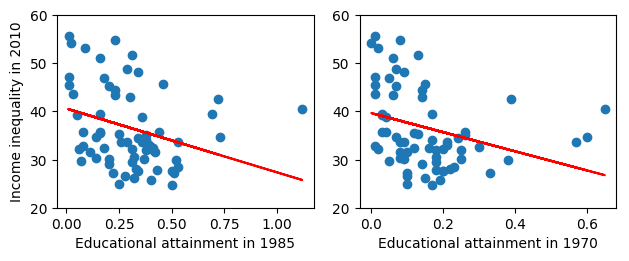

In [39]:
plt.subplot(2, 2, 1)
plt.xlabel('Educational attainment in 1985')
plt.ylabel('Income inequality in 2010')
fit85 = np.polyfit(df_merged85.ed_att_1985, df_merged85.inc_ineq_2010,1)
fit_fn85 = np.poly1d(fit85) 
plt.plot(df_merged85.ed_att_1985, df_merged85.inc_ineq_2010, 'o', df_merged85.ed_att_1985, fit_fn85(df_merged85.ed_att_1985), 'r-')
axes = plt.gca()
axes.set_ylim([20,60])
plt.subplot(2, 2, 2)
fit70 = np.polyfit(df_merged70.ed_att_1970, df_merged70.inc_ineq_2010,1)
fit_fn70 = np.poly1d(fit70) 
plt.plot(df_merged70.ed_att_1970, df_merged70.inc_ineq_2010, 'o', df_merged70.ed_att_1970, fit_fn70(df_merged70.ed_att_1970), 'r-')
plt.xlabel('Educational attainment in 1970')
axes = plt.gca()
axes.set_ylim([20,60])
plt.tight_layout()
plt.show()

The scatterplot presents an inverse relationship, above all for the 1970s data. This means that ceteris paribus, an increase in average years of tertiary schooling leads to lower income inequality in the future. 

There are some outliers which affect considerably the regression line. In a later stage it will be possible to read of the graph to which observations these outliers belong. 

Let's see what happens for data of the same year.

In [40]:
df_2010.dropna(how='any', inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 658 to 19962
Data columns (total 5 columns):
country       69 non-null object
date          69 non-null datetime64[ns]
GDP_capita    69 non-null float64
ed_att        69 non-null float64
inc_ineq      69 non-null float64
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 3.2+ KB


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


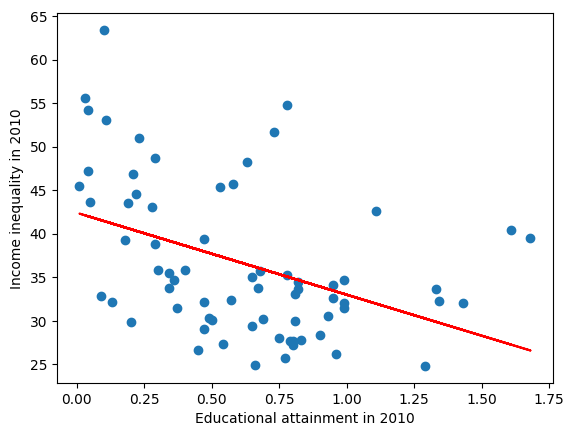

In [42]:
fit = np.polyfit(df_2010.ed_att, df_2010.inc_ineq,1)
fit_fn = np.poly1d(fit) 
plt.plot(df_2010.ed_att, df_2010.inc_ineq, 'o', df_2010.ed_att, fit_fn(df_2010.ed_att), 'r-')
plt.xlabel('Educational attainment in 2010')
plt.ylabel('Income inequality in 2010')
plt.show()

Again, the relationship is negative. We can compare the three plots by looking at which scatterplot best fit their trendline. we can do this by regressing the two variables and looking at p-values and R-squared values.

For educational attainment in 1970:

In [43]:
slope,intercept,r_value,p_value,std_err = linregress(df_merged70.ed_att_1970, df_merged70.inc_ineq_2010)
print('The slope of the regression line is ' + "%.2f" % slope)
print('The p-value of the regression is ' + "%.2f" % p_value)
print('The R-squared of the regression is ' + "%.2f" % pow(r_value, 2))

The slope of the regression line is -19.83
The p-value of the regression is 0.01
The R-squared of the regression is 0.09


For educational attainment in 1985:

In [44]:
slope,intercept,r_value,p_value,std_err = linregress(df_merged85.ed_att_1985, df_merged85.inc_ineq_2010)
print('The slope of the regression line is ' + "%.2f" % slope)
print('The p-value of the regression is ' + "%.2f" % p_value)
print('The R-squared of the regression is ' + "%.2f" % pow(r_value, 2))

The slope of the regression line is -13.23
The p-value of the regression is 0.01
The R-squared of the regression is 0.09


Finally, for educational attainment in 2010:

In [45]:
slope,intercept,r_value,p_value,std_err = linregress(df_2010.ed_att, df_2010.inc_ineq)
print('The slope of the regression line is ' + "%.2f" % slope)
print('The p-value of the regression is ' + "%.2f" % p_value)
print('The R-squared of the regression is ' + "%.2f" % pow(r_value, 2))

The slope of the regression line is -9.41
The p-value of the regression is 0.00
The R-squared of the regression is 0.18


As can be seen, contrary to my initial intuition, the values fit best for the same year. 
Therefore, I now want to estimate the relationship between income inequality, gdp per capita, and educational attainment using observations of the same year. I use all rows for which each variable has an observation to have the maximum amount of observations.

In [55]:
df_wb.dropna(how='any', inplace=True)
df_wb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 121 to 19962
Data columns (total 5 columns):
country       201 non-null object
date          201 non-null datetime64[ns]
GDP_capita    201 non-null float64
ed_att        201 non-null float64
inc_ineq      201 non-null float64
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 9.4+ KB


As can be read from the descriptive of the dataset, it contains 201 observations, a satisfying number to work with. I now make a scatterplot of educational attainment and income inequality such that we are actually able to identify which countries lay behind the points.

In [56]:
from bokeh.io import output_file, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import HoverTool
output_notebook()

hover = HoverTool(tooltips=[('Country','@country'),('Year','@date{%Y}')], formatters={'date': 'datetime'})

plot = figure(tools=[hover], plot_width=750 , y_axis_label='Income inequality (Gini)', x_axis_label='Educational attainment', y_range=(20,70), x_range=(0,1.8), title='Educational attainment and income inequality, World Bank')
plot.circle(y='inc_ineq', x='ed_att', size=7, source=df_wb)
output_file('inequality and education.html')
show(plot)

Loading BokehJS ...

The graph shows much less outliers compared to the graphs with income inequality in 2010 and educational attainment in 1970 and 1985. The points that are the furthest away from the general trend are those with average income inquality and very high educational attainment. These mainly correspond to the US and Russia. 

I now turn to estimate the average decrease in income inequality that follows an increase in educational attainment.

## 3.3 Regression analysis

Following the literature presented in my introduction, I will compute the square of gdp per capita. I will also compute the square of educational attainmnent, as it looks like the relationship between income inequality and educational attainment is quadratic. 

In [57]:
df_wb['gdp_capita_squared'] = df_wb['GDP_capita']**2
df_wb['ed_att_squared'] = df_wb['ed_att']**2
df_wb.head()

,country,date,GDP_capita,ed_att,inc_ineq,gdp_capita_squared,ed_att_squared
121,Albania,2005-01-01,2673.786584,0.13,30.6,7.149135e+06,0.0169
187,Algeria,1995-01-01,1444.908036,0.14,35.3,2.087759e+06,0.0196
628,Argentina,1980-01-01,2738.284723,0.22,40.8,7.498203e+06,0.0484
643,Argentina,1995-01-01,7373.428246,0.30,48.9,5.436744e+07,0.0900
648,Argentina,2000-01-01,7669.273916,0.24,51.1,5.881776e+07,0.0576


As can be seen, two new variables are added to the dataframe, i.e. the square of gdp per capita and the square of educational attainment.

Now I start with the analysis of the relationship between income inequality and educational attainment. As discussed in the introduction, most scholars have tried to replicate the Kuznets curve. This will be the first thing I will do as well. The following specification will be estimated

$$G_{it}=\beta_0+\beta_1Y_{it}+\beta_2Y^2_{it}+\mu_{it}$$

where $G_{it}$ is the Gini coefficient for country $i$ in year $t$, $Y_{it}$ is income per capita for country $i$ in year $t$ and $Y^2_{it}$ is the square of income per capita for country $i$ in year $t$.

In [50]:
import statsmodels.api as sm # import statsmodels 

X = df_wb[['GDP_capita','gdp_capita_squared']] 
y = df_wb["inc_ineq"]
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model


model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               inc_ineq   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     34.32
Date:                Wed, 30 Jan 2019   Prob (F-statistic):           1.60e-13
Time:                        16:49:01   Log-Likelihood:                -714.12
No. Observations:                 201   AIC:                             1434.
Df Residuals:                     198   BIC:                             1444.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 44.4066      0.814     54.569      0.000      42.802      46.011
GDP_capita            -0.0005   8.14e-05     -5.700      0.000      -0.001      -0.000
gdp_capita_squared   3.34e-09   1.16e-09      2.869      0.005    1.04e-09    5.64e-09
==============================================================================
Omnibus:                        6.123   Durbin-Watson:                   0.809
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                4.580
Skew:                           0.249   Prob(JB):                        0.101
Kurtosis:                       2.453   Cond. No.                     1.91e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The coefficients are both significant at a 1% confidence interval. However, the results show the opposite signs from what is expected considering the Kuznets curve. The curve I find is actually a U-curve, instead of an inversed U-curve, as the sign of $\beta_1$ is negative and £\beta_2$ is positive.

Let's take a look at the graph to understand what happened.

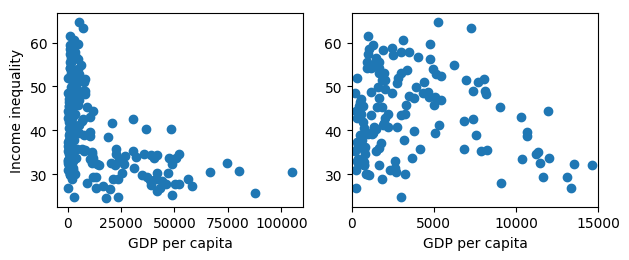

In [66]:
plt.subplot(2, 2, 1)
plt.xlabel('GDP per capita')
plt.ylabel('Income inequality')
plt.scatter(df_wb.GDP_capita,df_wb.inc_ineq)
plt.subplot(2, 2, 2)
plt.scatter(df_wb.GDP_capita,df_wb.inc_ineq)
axes = plt.gca()
axes.set_xlim([0,15000])
plt.xlabel('GDP per capita')
plt.tight_layout()
plt.show()

As can be seen, some outliers with very high income caused the curve to become U-shaped. By looking only at the incomes up to 15,000$ we do observe the Kuznets curve. 

I also want to look at income inequality and educational attainment. Since it seems that the relation is quadratic, I will add the square of educational attainment. The estimation will be as follows

$$G_{it}=\beta_0+\beta_1E_{it}+\beta_2E^2_{it}+\mu_{it}$$

where $G_{it}$ is the Gini coefficient for country $i$ in year $t$, $E_{it}$ is educational attainment for country $i$ in year $t$ and $E^2_{it}$ is the square of educational attainment for country $i$ in year $t$.

In [68]:
import statsmodels.api as sm # import statsmodels 

X = df_wb[['ed_att','ed_att_squared']] 
y = df_wb["inc_ineq"]
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model


model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               inc_ineq   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     20.38
Date:                Wed, 30 Jan 2019   Prob (F-statistic):           8.94e-09
Time:                        17:32:41   Log-Likelihood:                -725.22
No. Observations:                 201   AIC:                             1456.
Df Residuals:                     198   BIC:                             1466.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             47.5295      1.419     33.505      0.000      44.732      50.327
ed_att           -23.6026      5.252     -4.494      0.000     -33.959     -13.246
ed_att_squared    10.4459      3.873      2.697      0.008       2.807      18.084
==============================================================================
Omnibus:                       12.508   Durbin-Watson:                   0.761
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               11.026
Skew:                           0.498   Prob(JB):                      0.00403
Kurtosis:                       2.432   Cond. No.                         12.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Both coefficients are significant at a 1% confidence interval. The shape is an U-curve, as expected from the graphical analysis.
Finally, I'd like to merge the previous two specifications to understand if income or education is a better predictor of inequality. Therefore the specification will be as follows

$$G_{it}=\beta_0+\beta_1Y_{it}+\beta_2Y^2_{it}+\beta_3E_{it}+\beta_4E^2_{it}+\mu_{it}$$

In [70]:
import statsmodels.api as sm # import statsmodels 

X = df_wb[['GDP_capita','gdp_capita_squared','ed_att','ed_att_squared']] 
y = df_wb["inc_ineq"]
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model


model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               inc_ineq   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     18.07
Date:                Wed, 30 Jan 2019   Prob (F-statistic):           1.20e-12
Time:                        17:36:07   Log-Likelihood:                -712.49
No. Observations:                 201   AIC:                             1435.
Df Residuals:                     196   BIC:                             1451.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 46.3103      1.362     33.997      0.000      43.624      48.997
GDP_capita            -0.0004   9.79e-05     -3.781      0.000      -0.001      -0.000
gdp_capita_squared  2.549e-09   1.25e-09      2.042      0.042    8.73e-11    5.01e-09
ed_att                -9.3596      5.701     -1.642      0.102     -20.603       1.884
ed_att_squared         4.7799      3.824      1.250      0.213      -2.761      12.321
==============================================================================
Omnibus:                        6.608   Durbin-Watson:                   0.806
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                4.926
Skew:                           0.263   Prob(JB):                       0.0852
Kurtosis:                       2.443   Cond. No.                     1.61e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

While both income per capita and its square remain statistically significant, educational attainment loses its predictory power. This means that it is likely that income already captures most of the effect of educational attainment, and that therefore educational attainment has an effect on income inequality that passes through income per capita. 

# 4. Concluding remarks

In this project I have discussed from different perspectives the relation between income inequality and educational attainment. I first developed a model which explains some forces that link these two variables. Using the foundations of Mincer (1958), I showed how differences in earnings among age groups and education levels can shape the distribution of incomes accross the labor force. My model predicts a positive relationship between educational attainment and income inequality, measured through the Gini coefficient. The simplicity of the model did not allow for a control of other forces in play in real life, but still captured an important relation between ageing work population and income inequality. It also allowed me to show my acquired Python skills by playing with variables, figures, and loops.

In the second part of my project I showed how educational attainment and income inequality relate in empirical data. I first found that, counterintuitively, income inequality is better predicted by educational attainment of the same year instead of earlier years. I also found that the predictions of my model turned out to be wrong, as income inequality is negatively related to educational attainment. Then, I studied through OLS regressions how educational attainment, income inequality and income per capita relate to eachother. I find that GDP per capita is a better predictor of income inequality than educational attainment is, and that the effect of educational attainment on income inequality likely acts through income inequality. 

I would like to take advantage of the last lines of my project to thank professsor J. Boone and in general Tilburg University for the chance to use Datacamp and for this fun but above all very useful and appreciated course. I am very happy to know the basics of the Python language as it is a great skill and opens new possibilties.

# Literature

Ahluwalia, Montek S. 1976. “Inequality, Poverty and Development” Journal of Development Economics, 3, 307–342.

Kumhof, M., Rancière, R. 2011. "Inequality, Leverage and Crises"

Kuznets, S. 1955. “Economic Growth and Income Inequality” American Economic Review, 45, 1–28.

Mincer, Jacob. 1958. “Investment in Human Capital and Personal Income Distribution” Journal of Political Economy, 66, 281–302.

Nielsen, F., Alderson, A. S., 1997. “The Kuznets Curve and the Great U‐Turn: Income Inequality in U.S Countries, 1970 to 1990” American Sociological Review, 62, 12–33.

Park, K. H., 1996. "Educational expansion and educational inequality on income distribution", Economics of Education Review, 15 (1): 51-58

Piketty, T., 2015. "About Capital in the Twenty-First Century." American Economic Review, 105 (5): 48-53

Rajan, R., 2010. “Fault Lines” *Princeton University Press, Princeton, NJ*